# Introdução sobre a Análise de Componente Principal

---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.impute import SimpleImputer


pd.set_option('display.max_columns', None) # Exibir todas as colunas
ds = pd.read_csv('players_22.csv')
ds

C:\Users\junio\AppData\Local\Temp\ipykernel_31068\903795170.py:12: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [13]:
# Vamos verificar quantidades de nulos em nosso dataframe, não podemos aplicar o PCA
# se nossos dados tiverem linhas nulas, devemos tratar esses casos caso ocorram
# Existem diversas técnicas para tratar dados nulos, o método de escolha depende muito do seu objetivo
ds.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [14]:
ds_fifa_numerico = ds.select_dtypes([np.number])
imputer = SimpleImputer(strategy='mean')
ds_fifa = pd.DataFrame(imputer.fit_transform(ds_fifa_numerico), columns=ds_fifa_numerico.columns)

In [20]:
print(ds_fifa.isnull().sum())
print(ds.shape)
print(ds_fifa.shape)

sofifa_id                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
height_cm                      0
weight_kg                      0
club_team_id                   0
league_level                   0
club_jersey_number             0
club_contract_valid_until      0
nationality_id                 0
nation_team_id                 0
nation_jersey_number           0
weak_foot                      0
skill_moves                    0
international_reputation       0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_drib

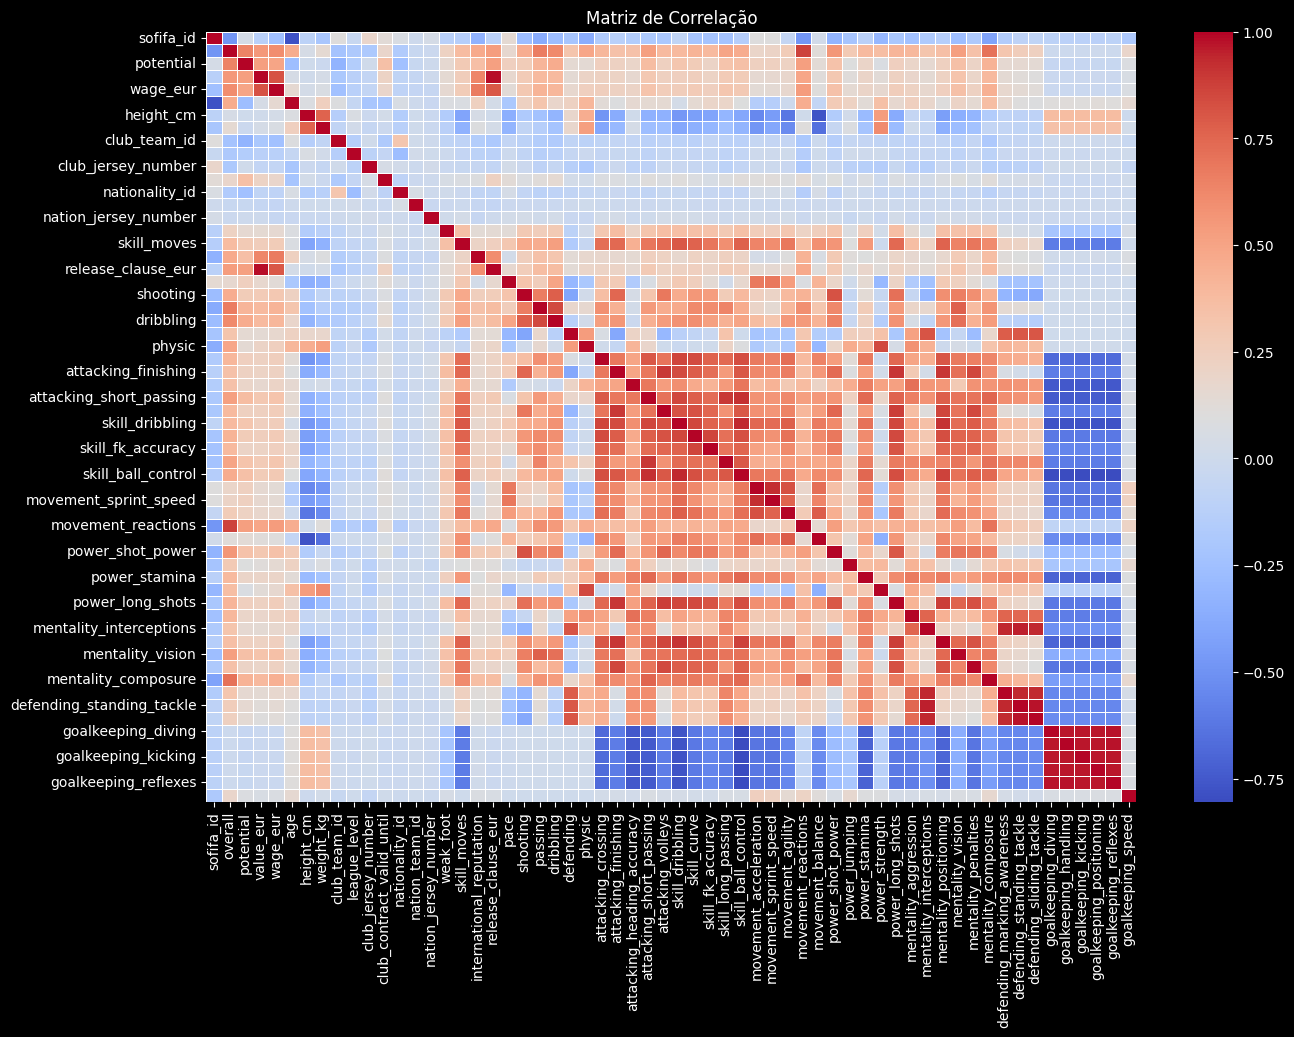

In [17]:
correton_matrix = ds_fifa.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correton_matrix, annot=False, fmt=".2f", cmap='coolwarm',  linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

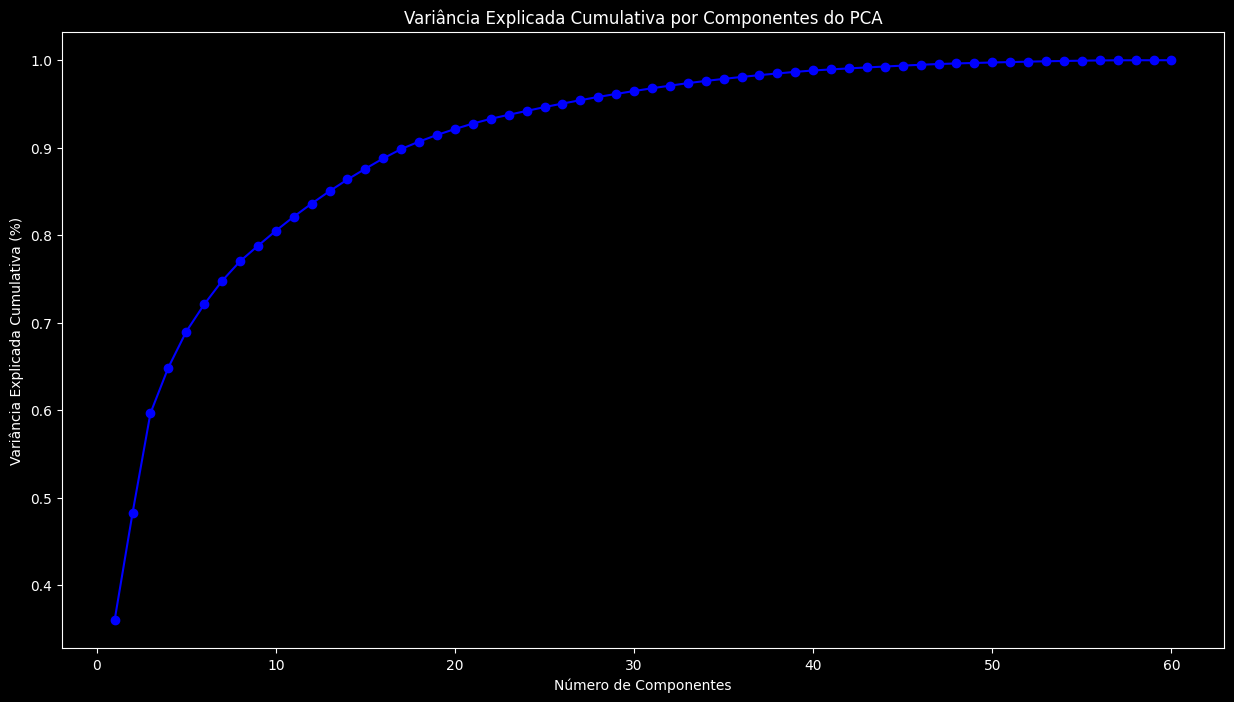

In [22]:
scaler = StandardScaler()
ds_fifa_padronizado = scaler.fit_transform(ds_fifa)
pca = PCA()
pca.fit(ds_fifa_padronizado)
explained_variance = np.cumsum(pca.explained_variance_ratio_)


# Crie o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa (%)')
plt.title('Variância Explicada Cumulativa por Componentes do PCA')  
plt.show()

Número de componentes necessários para explicar 80.0% da variância: 10


In [ ]:
# Define o limiar de variância acumulada que queremos explicar com o PCA (80%)
limiar_variancia = 0.80

# Encontra o número mínimo de componentes principais necessários para atingir o limiar de variância
# Encontrar o número de componentes necessários para atingir ou ultrapassar o limiar
num_componentes = np.argmax(explained_variance >= limiar_variancia) + 1
print(f"Número de componentes necessários para explicar {limiar_variancia*100}% da variância: {num_componentes}")

# Cria o objeto PCA para reduzir a dimensionalidade para o número de componentes encontrados
pca = PCA(n_components=num_componentes)

# Aplica o PCA aos dados padronizados, gerando os componentes principais
principal_components = pca.fit_transform(ds_fifa_padronizado)


# Obtém a razão de variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variância explicada por componente: {explained_variance_ratio}")

# Atualiza o número de componentes baseado no resultado do PCA
num_componentes = principal_components.shape[1]

# Cria os nomes das colunas para o DataFrame dos componentes principais usando list comprehension
colum_names = [f'PC{i+1}' for i in range(num_componentes)]

# Cria um DataFrame com os componentes principais, facilitando a análise posterior
df_principal_components = pd.DataFrame(data=principal_components, columns=colum_names)

# Exibe as primeiras linhas do DataFrame resultante
df_principal_components.head()

Número de componentes necessários para explicar 80.0% da variância: 10
Variância explicada por componente: [0.35987355 0.12243569 0.1141741  0.05223797 0.04113113 0.03103841
 0.0268517  0.0224194  0.017692   0.01716971]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,14.210223,-5.162168,15.409327,-7.898280,-6.241177,-1.627047,10.319873,6.941054,-1.297256,0.111136
1,13.364274,-1.849448,17.164792,-7.800535,-10.648250,-1.105334,11.946598,7.246309,-2.996562,0.391341
2,12.759237,-2.929506,14.784395,-1.972866,-5.180725,1.450131,7.763808,6.636183,-0.672214,1.554317
3,14.604426,-5.226395,16.436686,-12.085066,-9.631826,-1.891718,12.606835,7.857945,-3.311925,0.134067
4,14.900056,-1.102365,18.030189,-11.889059,-9.217311,-3.474394,11.884177,7.520638,-3.072125,1.472745


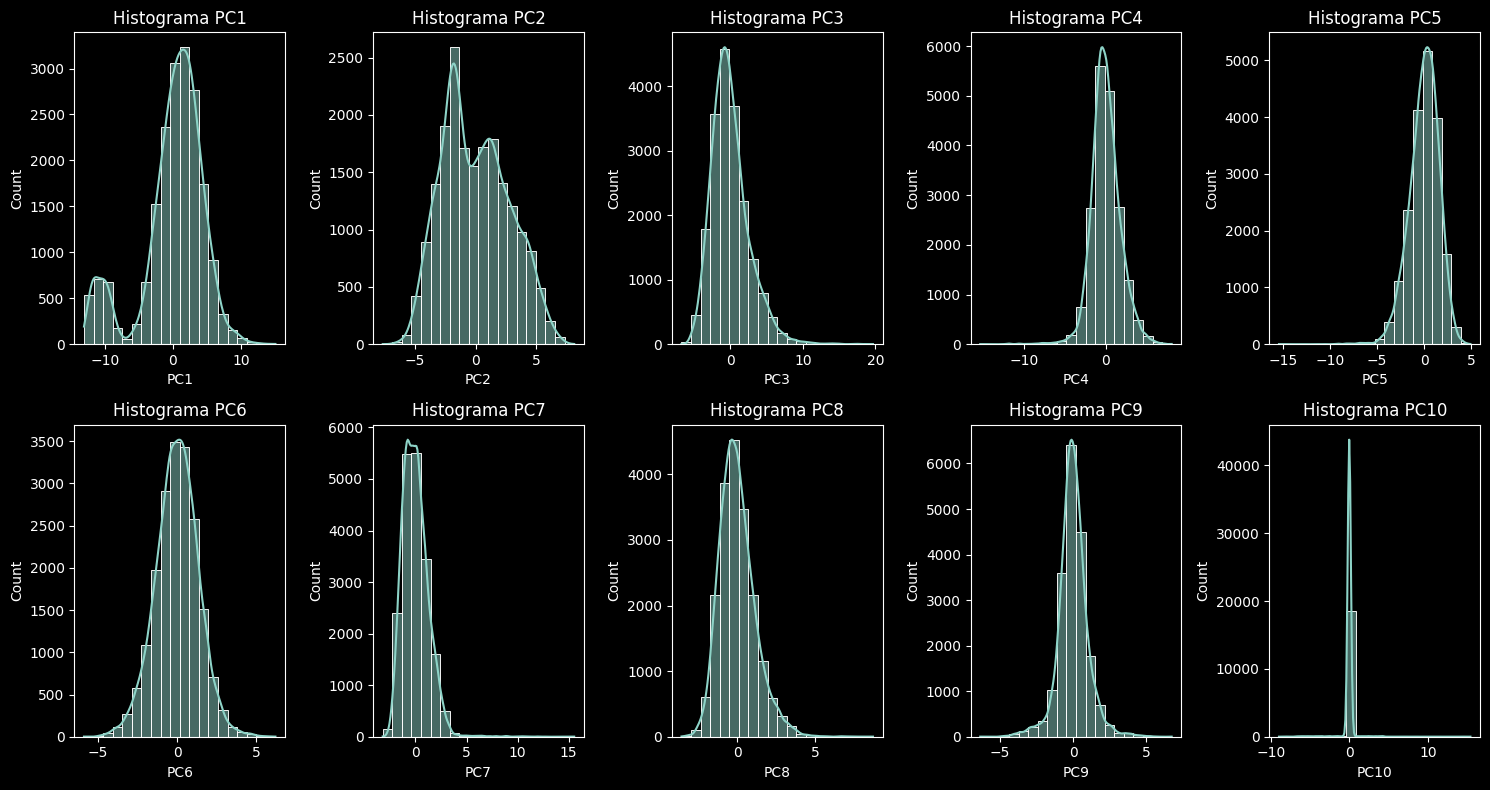

In [35]:
# Cria uma nova figura para os histogramas, definindo o tamanho
plt.figure(figsize=(15, 8))

# Utiliza enumerate e list comprehension para iterar sobre as 10 primeiras colunas dos componentes principais
for i, col in enumerate(df_principal_components.columns[:10]):
    # Define a posição do subplot (2 linhas, 5 colunas, posição i+1)
    plt.subplot(2, 5, i + 1)
    # Plota o histograma da coluna atual, com 20 bins e curva de densidade (kde)
    sns.histplot(df_principal_components[col], bins=20, kde=True)
    # Define o título do subplot usando f-string
    plt.title(f'Histograma {col}')

# Ajusta o layout para evitar sobreposição dos gráficos
plt.tight_layout()
# Exibe todos os histogramas na tela
plt.show()

In [37]:
from scipy.stats import shapiro  # Corrige o erro de digitação no import

# Vamos analisar a normalidade de cada componente principal após o PCA
for coluna in df_principal_components.columns:
    # Aplica o teste de Shapiro-Wilk para verificar normalidade
    stat, p_valor = shapiro(df_principal_components[coluna])
    print(f'Variável: {coluna}, Estatística de teste: {stat:.4f}, Valor p: {p_valor:.4f}')

    # Interpretação do valor p: se p > 0.05, assume-se normalidade
    if p_valor > 0.05:
        print(f'A variável {coluna} parece seguir uma distribuição normal.\n')
    else:
        print(f'A variável {coluna} não parece seguir uma distribuição normal.\n')

Variável: PC1, Estatística de teste: 0.9114, Valor p: 0.0000
A variável PC1 não parece seguir uma distribuição normal.

Variável: PC2, Estatística de teste: 0.9812, Valor p: 0.0000
A variável PC2 não parece seguir uma distribuição normal.

Variável: PC3, Estatística de teste: 0.9477, Valor p: 0.0000
A variável PC3 não parece seguir uma distribuição normal.

Variável: PC4, Estatística de teste: 0.9726, Valor p: 0.0000
A variável PC4 não parece seguir uma distribuição normal.

Variável: PC5, Estatística de teste: 0.9777, Valor p: 0.0000
A variável PC5 não parece seguir uma distribuição normal.

Variável: PC6, Estatística de teste: 0.9974, Valor p: 0.0000
A variável PC6 não parece seguir uma distribuição normal.

Variável: PC7, Estatística de teste: 0.9400, Valor p: 0.0000
A variável PC7 não parece seguir uma distribuição normal.

Variável: PC8, Estatística de teste: 0.9687, Valor p: 0.0000
A variável PC8 não parece seguir uma distribuição normal.

Variável: PC9, Estatística de teste: 0.9